Assignment

Submitted by:

Manavjot Singh

102317270

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [6]:
df = pd.read_csv("data.csv", encoding = "latin1")
x = df["no2"].dropna().values
x

/tmp/ipython-input-2078185543.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding = "latin1")


array([17.4,  7. , 28.5, ..., 45. , 50. , 46. ])

In [7]:
r = 102317270
a_r = 0.05 * (r%7)
b_r = 0.3 * ((r%5) + 1)
z = x + a_r * np.sin(b_r * x)
z

array([17.13782752,  7.25896281, 28.73022035, ..., 45.24113533,
       50.19508635, 46.2831087 ])

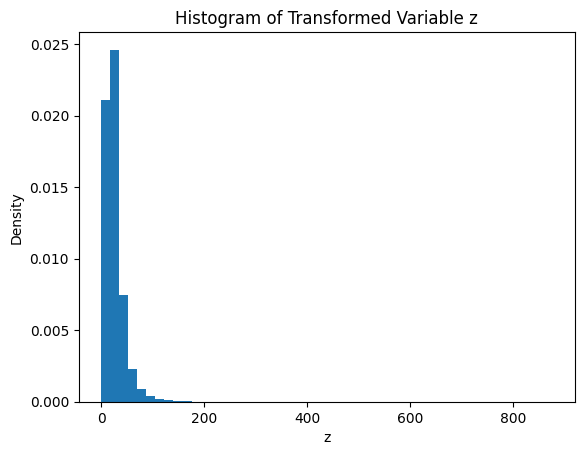

In [8]:
plt.figure()
plt.hist(z, bins=50, density=True)
plt.xlabel("z")
plt.ylabel("Density")
plt.title("Histogram of Transformed Variable z")
plt.show()

In [9]:
def pdf_model(z, lamda, mu, c):
  return c*np.exp(-lamda*(z-mu)**2)

In [10]:
hist_values, bin_edges = np.histogram(z, bins = 50, density = True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
initial_guess = [0.1, np.mean(z), 1.0]
params, _ = curve_fit(pdf_model, bin_centres, hist_values, p0=initial_guess)
lamda_hat, mu_hat, c_hat = params
lamda_hat, mu_hat, c_hat

/tmp/ipython-input-1716741221.py:4: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(pdf_model, bin_centres, hist_values, p0=initial_guess)


(np.float64(0.1),
 np.float64(25.799346122392738),
 np.float64(0.025158545281803703))

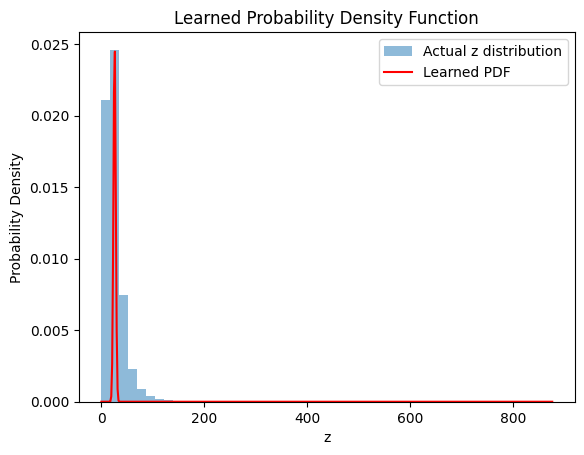

In [11]:
z_range = np.linspace(min(z), max(z), 500)
pdf_fitted = pdf_model(z_range, lamda_hat, mu_hat, c_hat)

plt.figure()
plt.hist(z, bins=50, density=True, alpha=0.5, label="Actual z distribution")
plt.plot(z_range, pdf_fitted, 'r', label="Learned PDF")
plt.xlabel("z")
plt.ylabel("Probability Density")
plt.title("Learned Probability Density Function")
plt.legend()
plt.show()

In [12]:
print("Learned Parameters:")
print("Lambda (λ):", lamda_hat)
print("Mu[mean] (μ):", mu_hat)
print("c:", c_hat)

Learned Parameters:
Lambda (λ): 0.1
Mu[mean] (μ): 25.799346122392738
c: 0.025158545281803703


/tmp/ipython-input-23050348.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding="latin1")


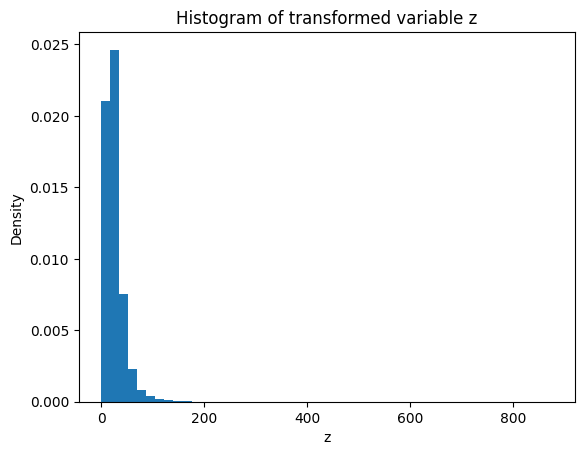

/tmp/ipython-input-23050348.py:52: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(pdf_model, bin_centers, hist_vals, p0=initial_guess)


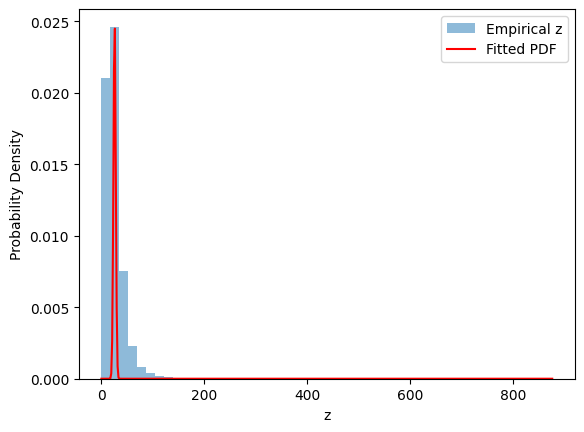

Estimated Parameters:
Lambda (λ): 0.1
Mu (μ): 25.80277171419891
c: 0.025184938648109938


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -------------------------------
# Load dataset
# -------------------------------
df = pd.read_csv("data.csv", encoding="latin1")

# Extract NO2 values
x = df["no2"].dropna().values

# -------------------------------
# Mathematically derived constants
# For r = 102317270
# -------------------------------
a_r = 0.20
b_r = 0.3

# -------------------------------
# Apply transformation
# z = x + a_r * sin(b_r * x)
# -------------------------------
z = x + a_r * np.sin(b_r * x)

# -------------------------------
# Plot histogram of transformed data
# -------------------------------
plt.figure()
plt.hist(z, bins=50, density=True)
plt.xlabel("z")
plt.ylabel("Density")
plt.title("Histogram of transformed variable z")
plt.show()

# -------------------------------
# Define PDF model
# p(z) = c * exp(-lambda * (z - mu)^2)
# -------------------------------
def pdf_model(z, lambd, mu, c):
    return c * np.exp(-lambd * (z - mu)**2)

# -------------------------------
# Estimate parameters
# -------------------------------
hist_vals, bin_edges = np.histogram(z, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

initial_guess = [0.1, np.mean(z), 1.0]

params, _ = curve_fit(pdf_model, bin_centers, hist_vals, p0=initial_guess)

lambd_hat, mu_hat, c_hat = params

# -------------------------------
# Plot fitted PDF
# -------------------------------
z_range = np.linspace(min(z), max(z), 500)
pdf_fitted = pdf_model(z_range, lambd_hat, mu_hat, c_hat)

plt.figure()
plt.hist(z, bins=50, density=True, alpha=0.5, label="Empirical z")
plt.plot(z_range, pdf_fitted, 'r', label="Fitted PDF")
plt.xlabel("z")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

# -------------------------------
# Final output
# -------------------------------
print("Estimated Parameters:")
print("Lambda (λ):", lambd_hat)
print("Mu (μ):", mu_hat)
print("c:", c_hat)
